# Chapter 12 AP

This assignment consists of two questions, one from the textbook and one written by the instructor. 

Each question is worth 20 points.

Requirements are similar to those for Chapter 2 AP.

## 1. Question 10 on page 555 of the textbook

Type your commands below. Be sure to organize your work clearly by using the Markdown.

### a. Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import scipy.io
import sklearn
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from statsmodels.datasets import get_rdataset 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from ISLP import load_data
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram , cut_tree)
from ISLP.cluster import compute_linkage

np.random.seed(20)
X1 = np.random.randn(20,50)
X1[:, 0] -= 5
X2 = np.random.randn(20,50)
X2[:, 0] += 5
X3 = np.random.randn(20,50)
X3[:, 1] += 5
X = np.concatenate((X1, X2, X3), axis=0)
truelabels = np.repeat([0,1,2], 20)
k = 3

### b. Perform PCA on the 60 observations and plot the first two prin- cipal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c).

Text(0, 0.5, 'PC2')

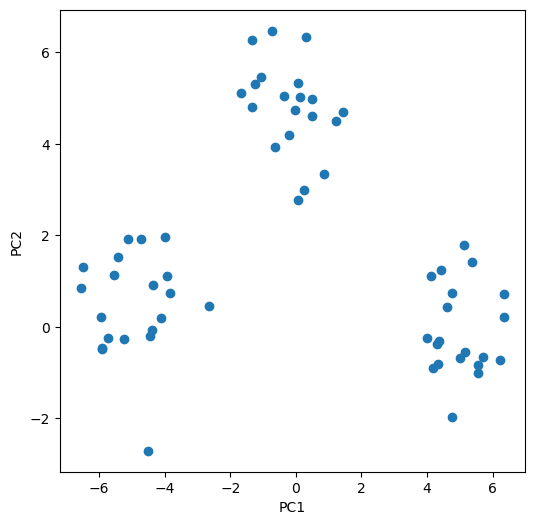

In [75]:
from sklearn.decomposition import PCA
#scaler = StandardScaler(with_std=True, with_mean=True)
#X_scaled = scaler.fit_transform(X)
pca = PCA()
pca.fit(X)
scores = pca.transform(X)
target = np.repeat([0,1,2], 20)

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
ax.scatter(X[:,0], X[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))

### Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

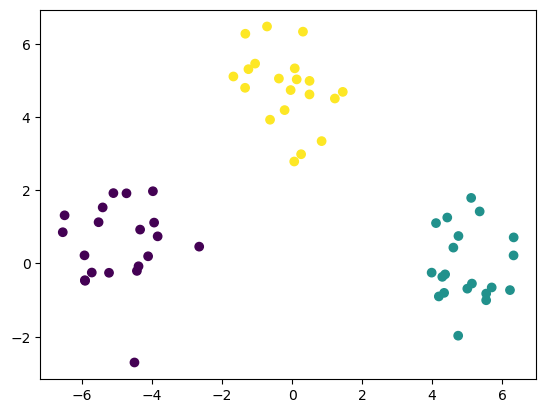

In [18]:
# kmeans++
kmeans = KMeans(n_clusters=3, n_init="auto").fit(X)

plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_)

In [19]:
import pandas as pd
pd.crosstab(target, [kmeans.cluster_centers_[:,0], 
                 kmeans.cluster_centers_[:,1], 
                 kmeans.cluster_centers_[:,2]],
            rownames=['Target'],
            colnames=['Cluster 1', 'Cluster 2', 'Cluster 3'])

Cluster 1,-4.940272,-0.164597,5.010127
Cluster 2,0.493164,4.793859,-0.068290
Cluster 3,-0.146639,-0.306500,-0.059183
Target,,,
0,1,0,0
1,0,0,1
2,0,1,0


In [76]:
import pandas as pd
pd.crosstab(target, kmeans.cluster_centers_,
            rownames=['Target'],
            colnames=['Cluster 1', 'Cluster 2', 'Cluster 3'])

ValueError: operands could not be broadcast together with shapes (1,60) (3,2) 

In [20]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(target, kmeans.labels_)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### Crosstab Interpretation: As seen in the crosstab table, there are three different clusters, and they appear to be equal in the PCA decomposition and the kmeans cluster interpretation.

### d). Perform K-means clustering with K = 2. Describe your results.

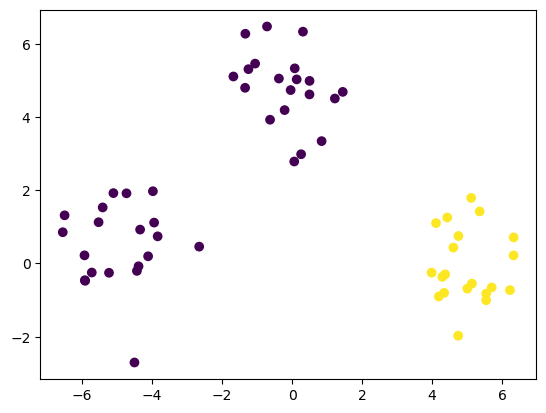

In [21]:
# kmeans++
kmeans = KMeans(n_clusters=2, n_init="auto").fit(X)

plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_)

In [22]:
pd.crosstab([target[0],target[1]], [kmeans.cluster_centers_[:,0], 
                kmeans.cluster_centers_[:,1]],
            rownames=['Target'],
            colnames=['Cluster 1', 'Cluster 2'])

Cluster 1,-2.552434,5.010127
Cluster 2,2.643512,-0.068290
Target,,
0,1,0
1,0,1


### e). Now perform K-means clustering with K = 4, and describe your results.

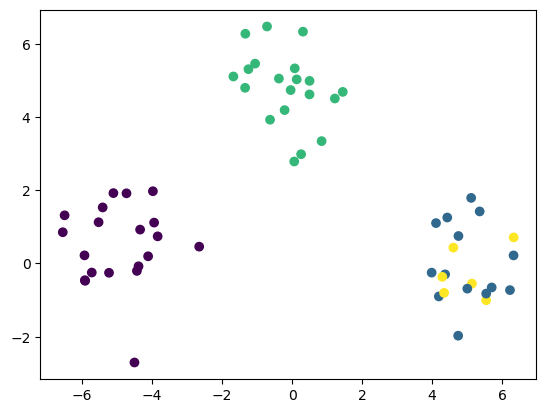

In [23]:
# kmeans++
kmeans = KMeans(n_clusters=4, n_init="auto").fit(X)

plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_)

### f). Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [24]:
#scores2 = scores.reshape(60, 2)
scores.shape

(60, 50)

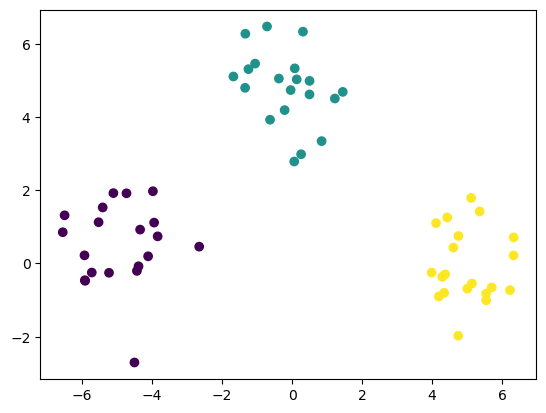

In [41]:
# kmeans++
kmeans = KMeans(n_clusters=3, n_init="auto").fit(scores)

plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_)

### g). Using the StandardScaler() estimator, perform K-means clus- tering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

NameError: name 'nci_groups' is not defined

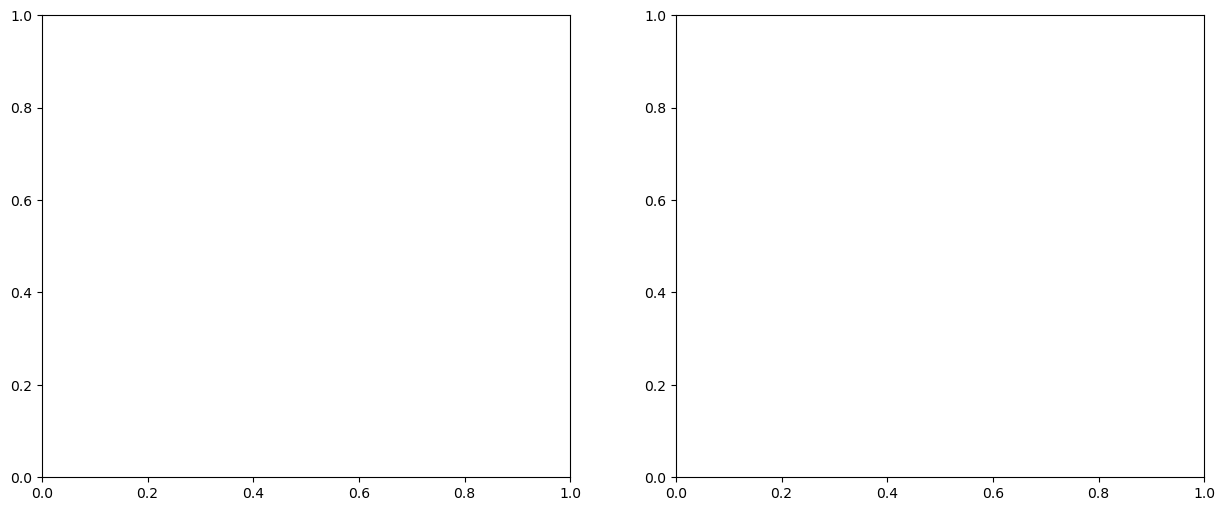

In [26]:
scaler = StandardScaler()
nci_scaled = scaler.fit_transform(X) 
nci_pca = PCA()
nci_scores = nci_pca.fit_transform(X)

fig, axes = plt.subplots(1, 2, figsize=(15,6))
ax = axes[0] 
ax.scatter(nci_scores[:,0],
           nci_scores[:,1], 
           c=nci_groups, 
           marker='o', 
           s=50)
ax.set_xlabel('PC1'); 
ax.set_ylabel('PC2')
ax = axes[1] 
ax.scatter(nci_scores[:,0],
           nci_scores[:,2], 
           c=nci_groups, 
           marker='o', 
           s=50)
ax.set_xlabel('PC1'); 
ax.set_ylabel('PC3');

## 2. Question written by the instructor 

In this assignment you are asked to perform kmeans and spectral clustering on the iris data set; for a detailed description, see https://archive.ics.uci.edu/dataset/53/iris.

### (1) First, load the data into Python using the following scripts.

In [60]:
from sklearn import datasets
from statsmodels.datasets import get_rdataset 
iris = datasets.load_iris().data
#iris = get_rdataset('iris').data 

The features are stored in iris['data'] and the labels are in iris['target'].

How many instances are there?

And what are the feature and response names?

### (2) Standardize the features of the iris data set for all subsequent steps.

In [61]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler(with_std=True, with_mean=True)
iris_scaled = scaler.fit_transform(iris)

### (3) Apply PCA to the data and plot their first two principal components, color coded by the true labels.

What percentage of the scatter of the data is explained by the top two principal components?

Text(0, 0.5, 'PC2')

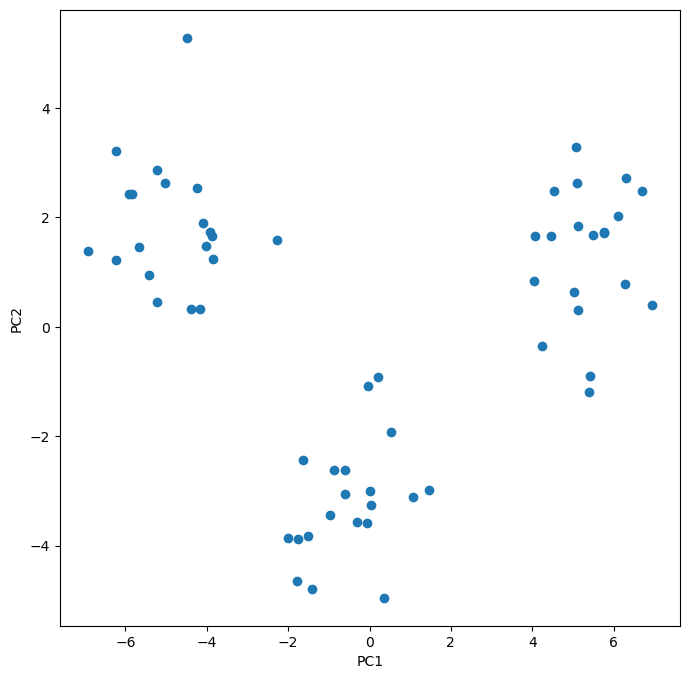

In [62]:
pcaIRIS = PCA()
pcaIRIS.fit(iris_scaled)

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))

### (4)  Apply kmeans, with the true number of clusters, to the iris data (using all the features, not the 2D principal components).  

Plot the clusters found by kmeans in the 2D PCA space (Note that kmeans was applied to the full data and just added a second set of labels to the data besides the true labels).

What is the confusion matrix between the true labels and the kmeans labels?


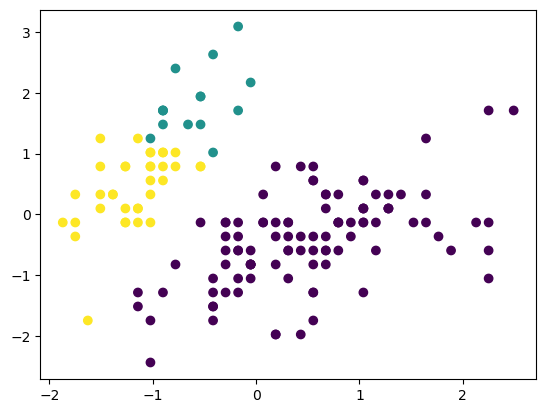

In [63]:
kmeans = KMeans(n_clusters=3, n_init="auto").fit(iris_scaled)
plt.scatter(x=iris_scaled[:,0], y=iris_scaled[:,1], c=kmeans.labels_)

### (5) Try different numbers of clusters with kmeans, k=2, ..., 6, and plot the amounts of total scatter (against k) found by kmeans. 

Can the elbow method correctly identify the number of clusters on this data set?

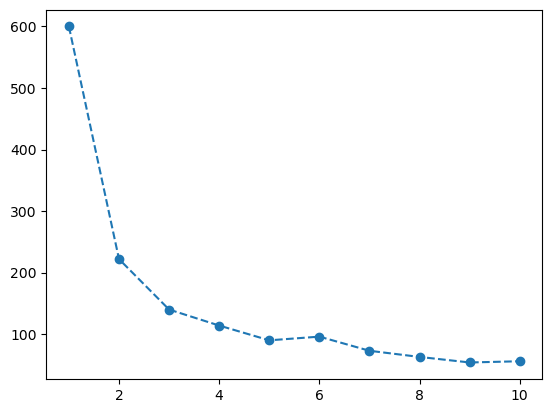

In [64]:
# selecting the number of clusters

scatter = np.array(range(10))
for i in range(10):
    kmeans = KMeans(n_clusters=i+1, n_init="auto").fit(iris_scaled)
    scatter[i] = kmeans.inertia_
    
plt.plot(np.array(range(10))+1, scatter, marker='o', linestyle="--")

222.36170496502305

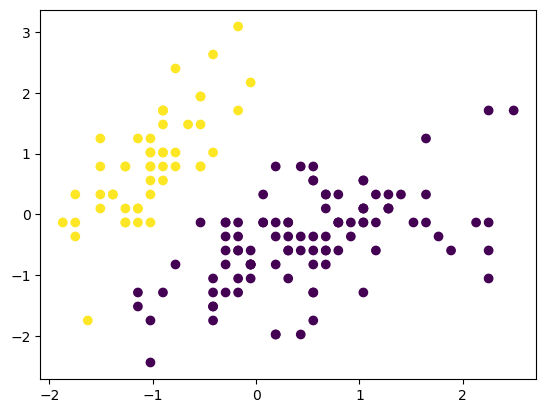

In [65]:
kmeans = KMeans(n_clusters=2, n_init="auto").fit(iris_scaled)
plt.scatter(x=iris_scaled[:,0], y=iris_scaled[:,1], c=kmeans.labels_);
kmeans.inertia_

114.5568442126292

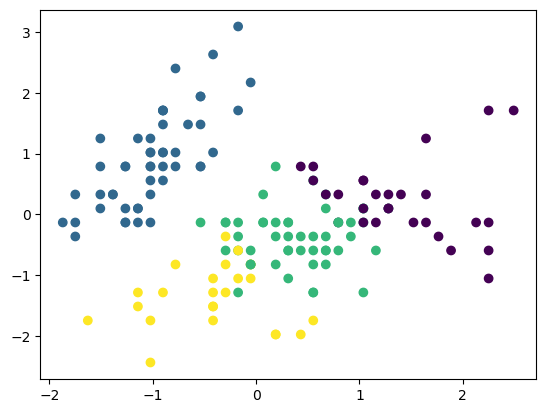

In [66]:
kmeans = KMeans(n_clusters=4, n_init="auto").fit(iris_scaled)
plt.scatter(x=iris_scaled[:,0], y=iris_scaled[:,1], c=kmeans.labels_);
kmeans.inertia_

### (6) Apply spectral clustering (with the true number of clusters) to the iris data that have been standardized. 

What value of the scale parameter sigma did you use and how did you find it?

Plot the clusters found by spectral clustering in the 2D PCA space and show the confusion matrix as well. Compare with the kmeans results.

In [67]:
from sklearn.neighbors import NearestNeighbors

r = 6
nbrs = NearestNeighbors(n_neighbors=r, algorithm='ball_tree').fit(iris_scaled)
distances, indices = nbrs.kneighbors(iris_scaled)
sigma = np.mean(distances[:,r-1])
sigma

0.5709518306775349

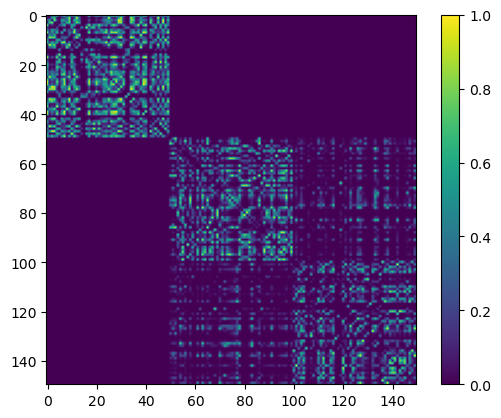

In [68]:
# direct implementation of spectral clustering from scratch

sigma = 0.5; # scale parameter

dists = sklearn.metrics.pairwise_distances(iris_scaled)  # compute pairwise distances
dists_sq = dists ** 2  # squared distances
dists_sq_scaled = dists_sq / (2*sigma**2);  # scale by sigma

W = np.exp(-dists_sq_scaled)  # taking exponential to get similarities
np.fill_diagonal(W, 0)  # set diagonals of W to zero

plt.imshow(W)
plt.colorbar()

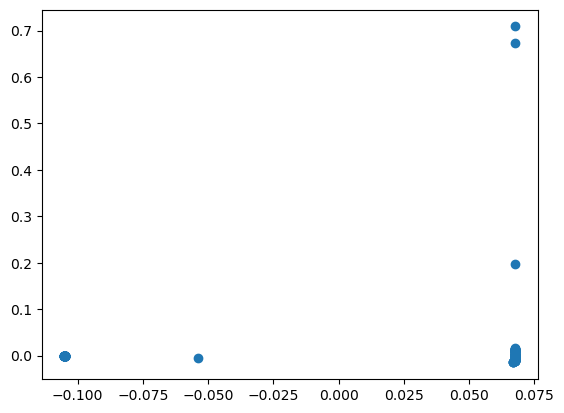

In [69]:
P = normalize(W, axis=1, norm='l1')           # scale each row by row sum 

eigvals, eigvecs = np.linalg.eig(P)           # compute eigenvalues and eigenvectors of P
#eigvecs[:,0] # v1 is a constant vector

idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

if k == 2:
    Y = np.array([eigvecs[:,1], np.zeros(n)]) # if only 2 clusters, then append v2 with a zero vector to make Y 2D
    Y = Y.transpose()
elif k>2:
    Y = eigvecs[:,1:k]                        # more than 2 clusters, use v_2 through v_k

plt.scatter(x=Y[:,0], y=Y[:,1])               # plot the embedding of the data by spectral clustering

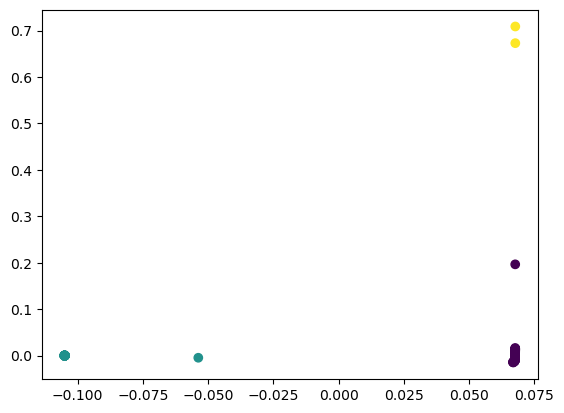

In [70]:
kmeans = KMeans(n_clusters=k, n_init="auto").fit(Y)   

plt.scatter(x=Y[:,0], y=Y[:,1], c=kmeans.labels_)

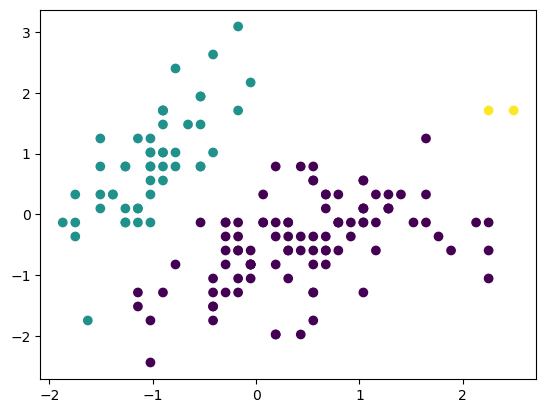

In [71]:
plt.scatter(x=iris_scaled[:,0], y=iris_scaled[:,1], c=kmeans.labels_)

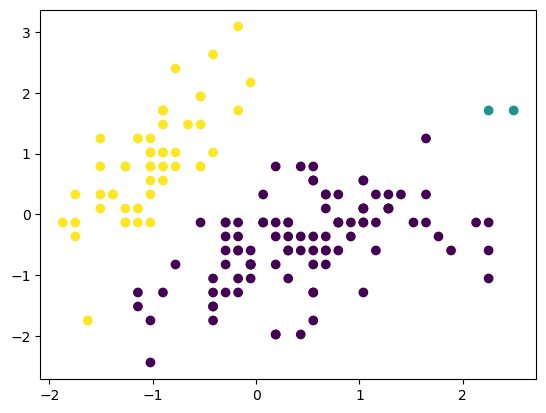

In [72]:
# There is a function in Python you can use instead for spectral clustering 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

from sklearn.cluster import SpectralClustering

speclust = SpectralClustering(n_clusters=k, gamma = 1/(2*sigma**2)).fit(iris_scaled)

plt.scatter(x=iris_scaled[:,0], y=iris_scaled[:,1], c=speclust.labels_)

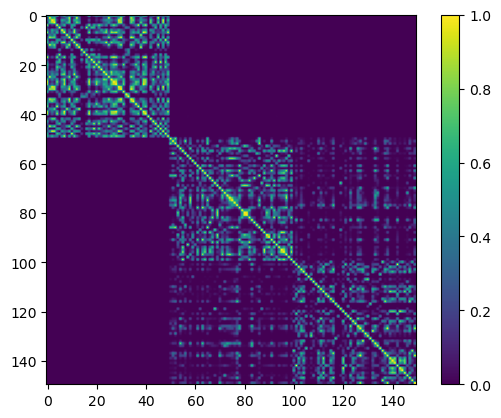

In [73]:
plt.imshow(speclust.affinity_matrix_)
plt.colorbar()

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(truelabels, speclust.labels_) 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)